In [52]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
questions = pd.read_csv('data/JEOPARDY_CSV.csv')

In [57]:
questions[' Question']
questions.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [58]:
text = " ".join(question for question in questions[' Question'] if not "<a href" in question)
print (f"There are {len(text)} words in the combination of all review.")

There are 16537913 words in the combination of all review.


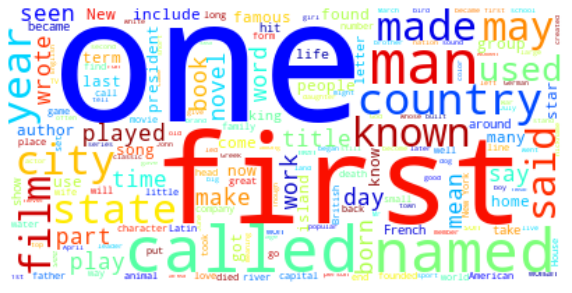

In [27]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["archive", "href", "target", 'blank', 'jpg', 'type', 'name'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color="white", colormap='jet').generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
logo_mask = np.array(Image.open("img/jeopardy-logo.png"))
# transformed_mask = (logo_mask ==0).astype('int')*255
mask = logo_mask

In [64]:
# Create a word cloud image
wc = WordCloud(background_color="black", max_words=500, mask=mask,
               stopwords=stopwords, contour_width=3, contour_color='white', colormap= 'cool')

# Generate a wordcloud
wc.generate(text)

# store to file

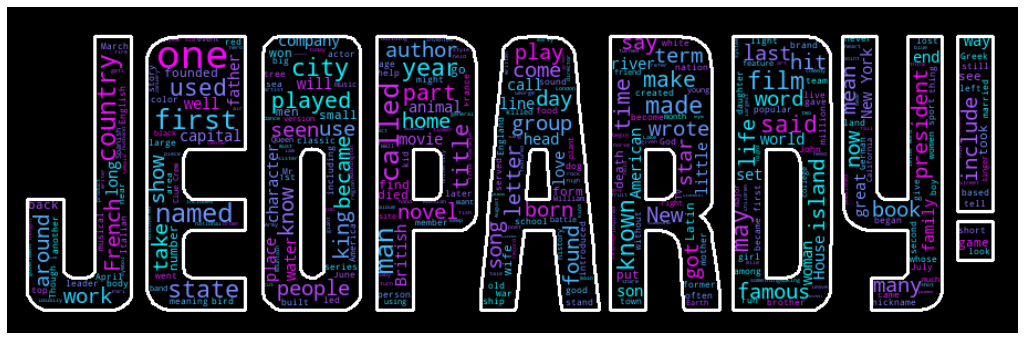

In [65]:
plt.figure(figsize = (20,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("img/jeopardy_word_cloud.png")
plt.show()